In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
indianapolis_df = pd.read_csv('../Data/Clean/indianapolis.csv')

In [3]:
indianapolis_df.head()


,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,44.0,31.0,50.0,9565.188841,0.165976,297822.061594,276.0,2284.0,163700.591608,3.482,4.033,0.550
1,2018-02,44.0,29.0,48.0,9187.455993,0.147806,320292.490323,317.0,2459.0,164520.933841,3.785,4.330,0.545
2,2018-03,50.0,28.0,40.0,9530.067247,0.154958,333248.685714,315.0,3118.0,165635.755273,3.910,4.444,0.534
3,2018-04,58.0,29.0,36.0,9858.027416,0.173512,363757.471774,249.0,3529.0,166888.280898,3.925,4.468,0.543
4,2018-05,61.0,36.0,25.0,10074.075684,0.221585,346813.219178,221.0,4005.0,168294.331977,4.066,4.586,0.520


In [4]:
# Check for missing values 
print(indianapolis_df.isnull().sum())

DATE                         0
MarketTempIdx                0
DaysToClose                  0
DaysOnZillow                 0
ListingPriceCutAmt           0
ListingPriceCutPct           0
NewConstructMeanSalePrice    0
NewConstructSalesCount       0
SalesCount                   0
SalePrice                    0
MORTGAGE15US                 0
MORTGAGE30US                 0
RATE_DIFFERENCE              0
dtype: int64


In [5]:
indianapolis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DATE                       78 non-null     object 
 1   MarketTempIdx              78 non-null     float64
 2   DaysToClose                78 non-null     float64
 3   DaysOnZillow               78 non-null     float64
 4   ListingPriceCutAmt         78 non-null     float64
 5   ListingPriceCutPct         78 non-null     float64
 6   NewConstructMeanSalePrice  78 non-null     float64
 7   NewConstructSalesCount     78 non-null     float64
 8   SalesCount                 78 non-null     float64
 9   SalePrice                  78 non-null     float64
 10  MORTGAGE15US               78 non-null     float64
 11  MORTGAGE30US               78 non-null     float64
 12  RATE_DIFFERENCE            78 non-null     float64
dtypes: float64(12), object(1)
memory usage: 8.1+ KB


In [6]:
# Check the shape of indianapolis DataFrame (rows, columns)
print(indianapolis_df.shape)

(78, 13)


In [7]:
# Round the specified columns to 0 decimals
indianapolis_df['ListingPriceCutAmt'] = indianapolis_df['ListingPriceCutAmt'].round(0)
indianapolis_df['NewConstructMeanSalePrice'] = indianapolis_df['NewConstructMeanSalePrice'].round(0)
indianapolis_df['SalePrice'] = indianapolis_df['SalePrice'].round(0)
indianapolis_df.head()

,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,44.0,31.0,50.0,9565.0,0.165976,297822.0,276.0,2284.0,163701.0,3.482,4.033,0.550
1,2018-02,44.0,29.0,48.0,9187.0,0.147806,320292.0,317.0,2459.0,164521.0,3.785,4.330,0.545
2,2018-03,50.0,28.0,40.0,9530.0,0.154958,333249.0,315.0,3118.0,165636.0,3.910,4.444,0.534
3,2018-04,58.0,29.0,36.0,9858.0,0.173512,363757.0,249.0,3529.0,166888.0,3.925,4.468,0.543
4,2018-05,61.0,36.0,25.0,10074.0,0.221585,346813.0,221.0,4005.0,168294.0,4.066,4.586,0.520


In [8]:
#Linear Regression for indianapolis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
#Split indianapolis Data into training and test set
X = indianapolis_df[['DaysToClose', 'DaysOnZillow', 'ListingPriceCutAmt', 'ListingPriceCutPct', 'NewConstructMeanSalePrice', 'NewConstructSalesCount', 'SalesCount', 'MORTGAGE15US', 'MORTGAGE30US', 'RATE_DIFFERENCE']]
y = indianapolis_df['SalePrice']

In [10]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the Linear Regression model
model = LinearRegression()

In [12]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Evaluate the model
y_pred = model.predict(X_test)

In [14]:
y_pred

array([193418.13800016, 160835.16242126, 196291.05404813, 188969.81959714,
       199863.36467735, 270865.6570278 , 183562.31383796, 180685.70228629,
       259968.87878431, 274576.58962399, 276324.34670319, 198239.27425936,
       254187.49927759, 273864.69301303, 179258.17503704, 218968.19512039])

In [15]:
#y_pred_rounded = np.round(y_pred,0)

In [16]:
# Calculate evaluation metrics
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {linear_mse}")
print(f"R-Squared Score: {linear_r2}")

Mean Squared Error: 159471770.92945266
R-Squared Score: 0.9172905037316209


In [17]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [18]:
rf_model = RandomForestRegressor()

In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [20]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
rf_y_pred = rf_model.predict(X_test)

In [22]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared Score: {rf_r2}")

Mean Squared Error: 159471770.92945266
R-squared Score: 0.9172905037316209


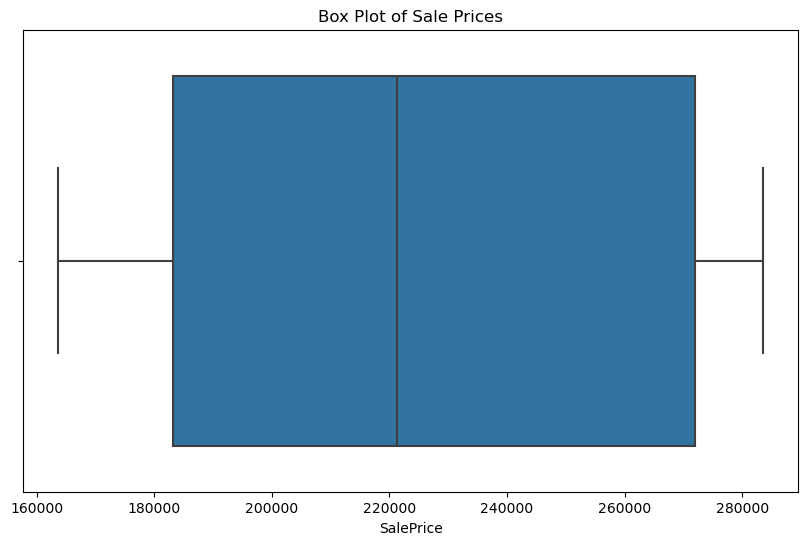

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'SalePrice' is your target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=indianapolis_df['SalePrice'])
plt.title('Box Plot of Sale Prices')
plt.show()

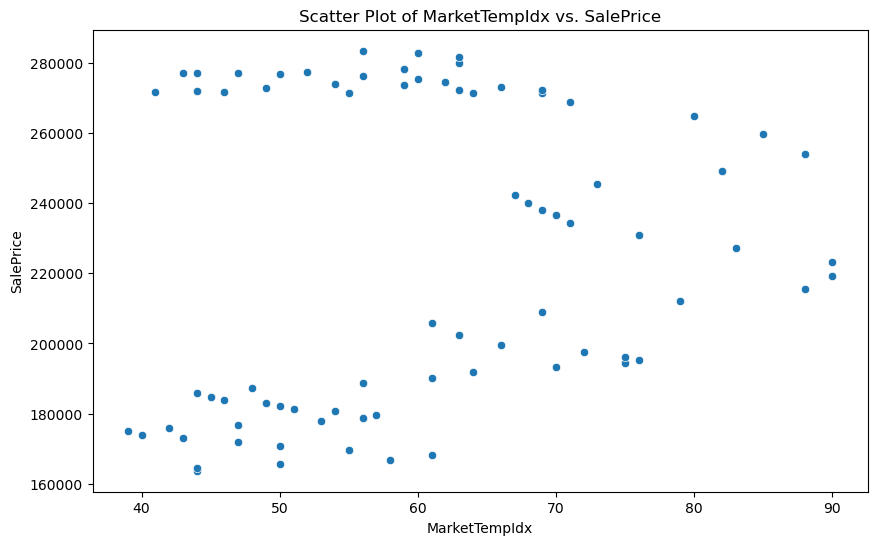

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=indianapolis_df['MarketTempIdx'], y=indianapolis_df['SalePrice'])
plt.title('Scatter Plot of MarketTempIdx vs. SalePrice')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


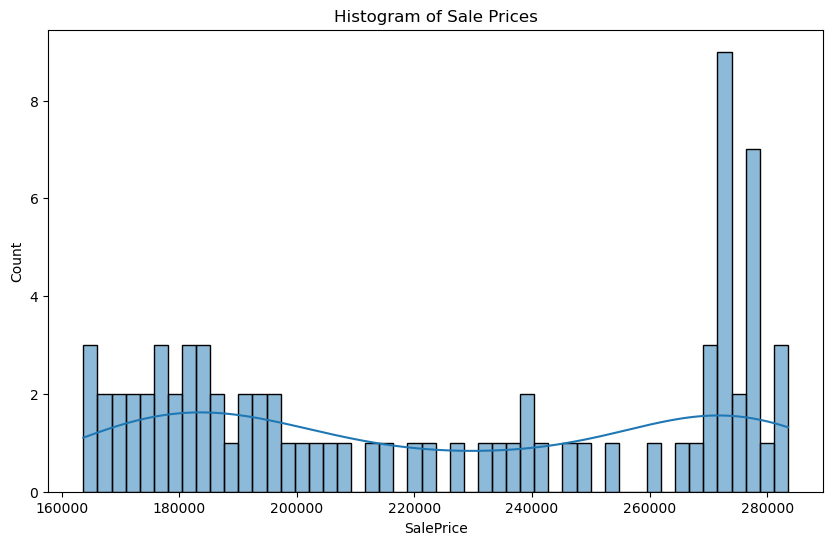

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(indianapolis_df['SalePrice'], bins=50, kde=True)
plt.title('Histogram of Sale Prices')
plt.show()